
# Employee Attrition Prediction Model

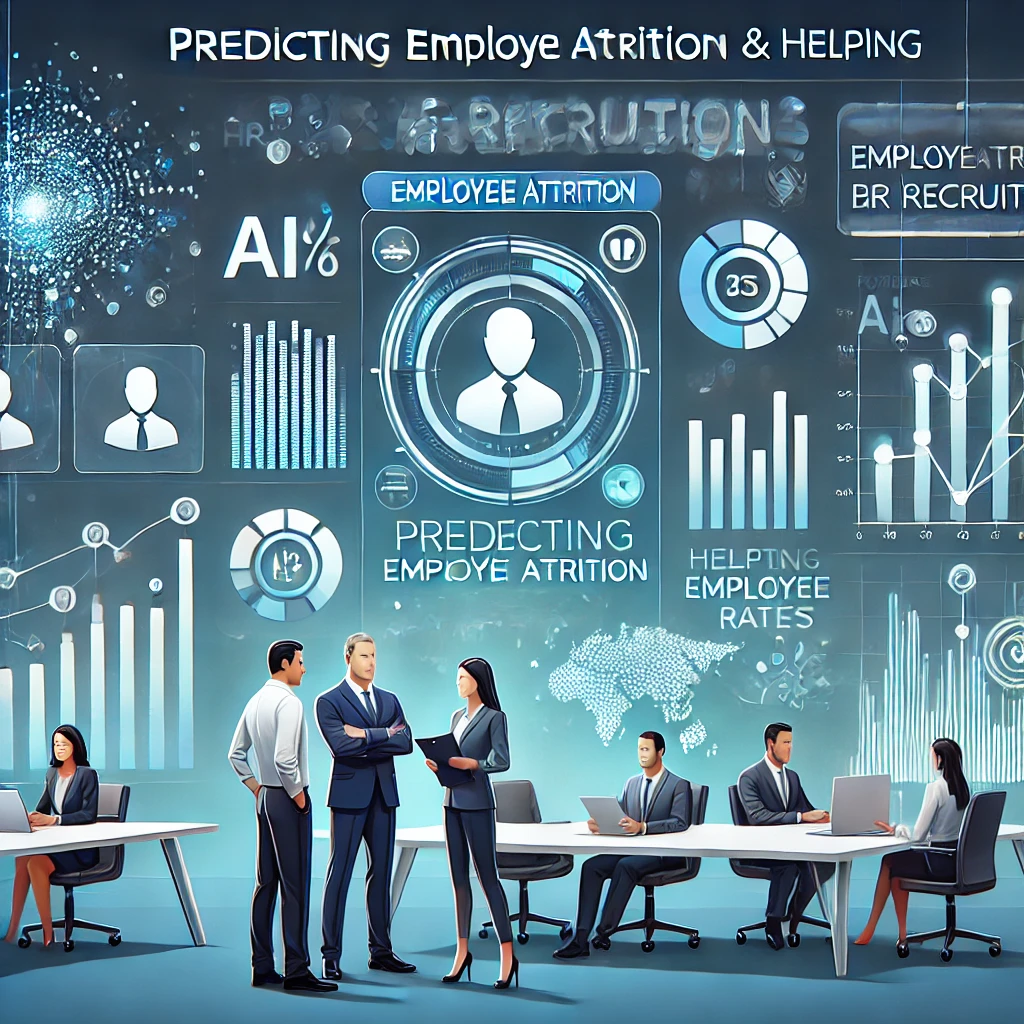

# Project Title: Predicting Employee Attrition and Helping HR’s for Recruitment


### **Overview:**
Employee turnover (attrition) is a major cost to an organization. The project focuses on understanding the reasons behind employee attrition and predicting future turnover to support HR recruitment strategies. This aim to address both tangible costs (e.g., training) and intangible losses (e.g., knowledge and relationships). Additionally, we provide tools to predict the attrition rate of potential recruits.


**left** is the target variable for an employee attrition prediction model in Employee Attrition dataset. This column typically indicates whether an employee has left the company (with values like 1 for "Yes" and 0 for "No").

**left** column represents a classification problem.
It is a binary classification problem because the target variable (left) has only two possible outcomes:
1: The employee left the company.
0: The employee stayed with the company.​

**Problem Statement:**
The goal is to predict whether an employee is likely to leave a company (attrition) based on various factors such as their work experience, performance, job satisfaction, salary, and other related data. By understanding the factors that influence attrition, companies can take steps to retain employees and improve workplace satisfaction.









### **Data Source:**
- **Link:** [Employee Attrition Dataset](https://drive.google.com/drive/folders/1f_dl3oiu6jBjrJCA5eaZfaa1AGUKfRNk)

**Employee Attrition Dataset contains:**
    
**Discrete Columns:**
    
**1.name:** (Categorical) Represents unique employee names or identifiers.
    
**2.number_projects:** (Numeric) Count of projects an employee is working on.
    
**3.time_spent_company:** (Numeric) Years spent at the company.
    
**4.work_accident:** (Binary) 0 or 1, indicating whether an employee had a work accident.
    
**5.left:** (Binary) 0 or 1, indicating whether the employee left.
    
**6.promotion_last_5_years:** (Binary) 0 or 1, indicating if promoted in the last 5 years.
    
**7.department:** (Categorical) Represents the department name.
    
**8.salary:** (Categorical) Represents the salary category (low, medium, high).
    
**9.salary_level:** (Numeric) Encoded salary level corresponding to salary.
    
**Continuous Columns:**
    
**1.satisfaction_level:** Represents employee satisfaction, usually between 0 and 1.
    
**2.last_evaluation:** Performance evaluation score, typically between 0 and 1.
    
**3.average_monthly_hours:** Hours worked per month.


### **Project Work:**

#### **Phase 1:**
1. **Data Analysis:** Explore and hypothesize based on available data.
2. **Data Cleaning:** Prepare data for analysis.
3. **Visualization:** Insights using PowerBI.
4. **Feature Engineering:** Enhance features to improve model performance.
5. **Encoding Categorical Variables:** converts text-based categories into numerical values. 
6. **Feature selection:** identifies the most relevant variables to improve model accuracy and reduce complexity.
7. **Model Building:** Test models including Decision Tree, Logistic Regression, SVM, and Random Forest.

#### **Phase 2:**
1. **Model Finalization:** Develop a pickle file for the best model.
2. **Comprehensive Analysis:** Use PowerBI for outcome visualization.


### **Research Paper Reference:**
- **Title:** Early Prediction of Employee Attrition using Data Mining  
- **Source:** [IEEE Research Paper](https://ieeexplore.ieee.org/document/8692137)


# 1.Importing Libraries:like numpy, pandas, seaborn, and matplotlib 

- **numpy (np):** A library for numerical computations, especially for working with arrays and matrices.  
- **pandas (pd):** A library for data manipulation and analysis, especially for working with structured data.  
- **seaborn (sns):** A library for creating beautiful and informative statistical graphics.  
- **matplotlib.pyplot** (plt): A library for creating basic plots and visualizations.  
- **%matplotlib inline:** A special command for Jupyter Notebooks to display plots directly in the notebook.

In [1]:
import numpy as np    
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2.Importing Machine Learning Tools

- **Decision Tree Classifier:** A machine learning model that splits data based on feature conditions to classify it.

- **Random Forest Classifier:** An ensemble model combining multiple decision trees to improve classification performance.

- **K-Nearest Neighbors (KNN):** classifies data points based on the majority class of their k nearest neighbors in the feature space.
    
- **Naive Bayes:** A probabilistic classifier based on Bayes' Theorem, which assumes that features are independent given the class label.  
    
- **Linear Regression:** A model used to predict a continuous target variable by fitting a linear relationship between the input features and the target.

- **train_test_split:** Imports a utility function to split a dataset into training and testing subsets for model evaluation.

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 3.Importing Deep Learning Tools

-**Feedforward Neural Network (FNN):** A basic neural network where information moves in one direction from input to output through hidden layers.
-** 

In [3]:
from sklearn.neural_network import MLPClassifier


# 4.Importing Performance Metrics

- **accuracy_score:** Measures the percentage of correct predictions.
    
- **precision_score:** Evaluates the proportion of true positives among predicted positives.
    
- **recall_score:** Measures the proportion of true positives among actual positives.
    
- **f1_score:** Combines precision and recall into a harmonic mean.
    
- **classification_report:** Provides a detailed summary of precision, recall, F1-score, and support for each class.

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 5.Suppressing Warnings

- **warnings:** A library for handling warning messages.
- **warnings.filterwarnings('ignore'):** This suppresses warning messages to avoid cluttering the output.


In [5]:
import warnings
warnings.filterwarnings('ignore')

# Phase 1:

# 1. Data Analysis

Explore the data to check its structure and statistics.

• Load the employee dataset from a CSV file using pandas.

In [6]:
data = pd.read_csv('C://Users//SHONIMA S//OneDrive//Documents//entry project//Employee_data_.csv', delimiter=',')

In [7]:
data.head()  #Displays the first few rows (default 5) of the dataset.

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,1


In [8]:
data.describe()   #Shows summary statistics (like mean, min, max) for numerical columns in the dataset.

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data.info()  # Provides a summary of the dataset, including the number of non-null entries and data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    14998 non-null  object 
 1   satisfaction_level      14999 non-null  float64
 2   last_evaluation         14999 non-null  float64
 3   number_projects         14999 non-null  int64  
 4   average_monthly_hours   14999 non-null  int64  
 5   time_spent_company      14999 non-null  int64  
 6   work_accident           14999 non-null  int64  
 7   left                    14999 non-null  int64  
 8   promotion_last_5_years  14999 non-null  int64  
 9   department              14999 non-null  object 
 10  salary_level            14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [10]:
# Check for missing values 
missing_values = data.isnull().sum()   #creates a new dataset of the same size as data, but each value is replaced with True if it's missing and False otherwise.
print("Missing Values:\n", missing_values)

Missing Values:
 name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary_level              0
dtype: int64


In [11]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


In [12]:
# Count the occurrences of each value in the 'left' column.left column is the target column in the dataset.
value_counts = data['left'].value_counts()

# Display the results
print("Class distribution in the target column:")
print(value_counts)

Class distribution in the target column:
0    11428
1     3571
Name: left, dtype: int64


In [13]:
id = list(range(0,14999))

In [14]:
data['id'] = id

In [15]:
data.drop('name',axis = 1,  inplace = True)

In [16]:
data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary_level,id
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,2,2
3,0.72,0.87,5,223,5,0,1,0,sales,1,3
4,0.37,0.52,2,159,3,0,1,0,sales,1,4


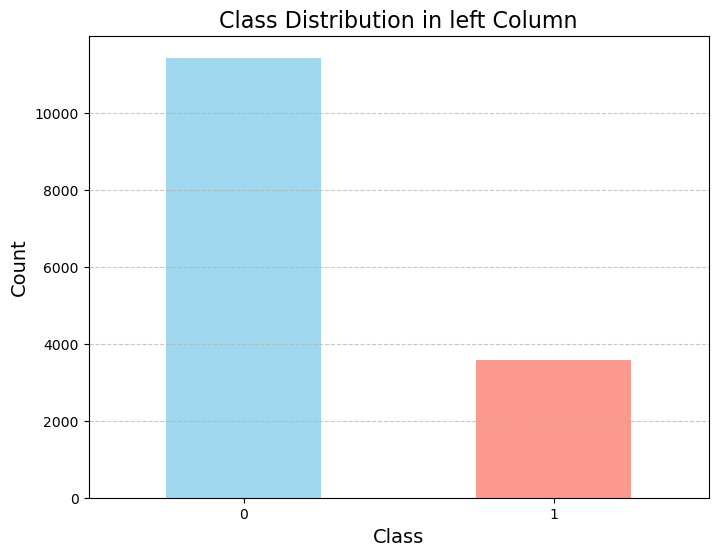

In [17]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
plt.title('Class Distribution in left Column', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
variance = data.var(numeric_only=True)

# Define a threshold for considering significant difference in variance 
mean_variance = variance.mean()

# Check if variance for any column significantly deviates from the mean
imbalanced_columns = variance[variance > mean_variance * 2]  # Columns with variance more than twice the mean

# Display results
if not imbalanced_columns.empty:
    print(f"\nThe dataset is imbalanced. Columns with significantly higher variance are:")
    print(imbalanced_columns)
else:
    print("\nThe dataset is relatively balanced. Variance across columns is uniform.")


The dataset is imbalanced. Columns with significantly higher variance are:
id    18748750.0
dtype: float64


In [19]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
print(data.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary_level', 'id'],
      dtype='object')


In [21]:
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'data' is a DataFrame with features and a target column 'left'
# Replace 'left' with the actual column name of your target variable

# Separate features and target variable
X = data.drop(columns=['left'])  # Features
y = data['left']  # Target

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])  # Convert categorical to numeric

# Check class distribution before balancing
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after balancing
print("Class distribution after SMOTE:", Counter(y_resampled))

# Convert back to DataFrame
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                           pd.DataFrame(y_resampled, columns=['left'])], axis=1)

# Verify if the dataset is now balanced
def is_balanced(y):
    counts = Counter(y)
    min_count = min(counts.values())
    max_count = max(counts.values())
    return max_count - min_count <= 0.1 * max_count  # Check if class counts differ by at most 10%

print("Is the dataset balanced?", is_balanced(y_resampled))


Class distribution before SMOTE: Counter({0: 11428, 1: 3571})
Class distribution after SMOTE: Counter({1: 11428, 0: 11428})
Is the dataset balanced? True


In [22]:
print(balanced_data.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident',
       'promotion_last_5_years', 'department', 'salary_level', 'id', 'left'],
      dtype='object')


In [23]:
# Check for missing values 
missing_values = balanced_data.isnull().sum()   #creates a new dataset of the same size as data, but each value is replaced with True if it's missing and False otherwise.
print("Missing Values:\n", missing_values)

Missing Values:
 satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
promotion_last_5_years    0
department                0
salary_level              0
id                        0
left                      0
dtype: int64


In [24]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


**Analyze Employee status :**

- **data['left'] == 1 :** creates a condition that checks which rows have 'left' equal to 1 (i.e., employees who left).
- **data[...]:** filters the dataset to include only rows where the condition is True.
- **.shape:** gives the dimensions of the filtered dataset as (number of rows, number of columns).
- **.shape[0]:** extracts the number of rows, i.e., the count of employees who left.




In [25]:
#Counts the number of employees who have left the company.
print("Employees left:", balanced_data[balanced_data['left'] == 1].shape[0])
#Counts the number of employees who are still working at the company.
print("Employees stayed:", balanced_data[balanced_data['left'] == 0].shape[0])

Employees left: 11428
Employees stayed: 11428


In [26]:
# Group-wise mean comparison
group_left = balanced_data[balanced_data['left'] == 1].mean()  #It filters the data for employees who left and calculates the average of their data.
group_stay = balanced_data[balanced_data['left'] == 0].mean()  #filters the data for employees who haven't left  and calculates the average of their data.
print("Average values of employees who left:\n", group_left)
print("Average values of employees who stayed:\n", group_stay)


Average values of employees who left:
 satisfaction_level           0.437268
last_evaluation              0.718298
number_projects              3.722874
average_monthly_hours      207.437609
time_spent_company           3.761201
work_accident                0.016538
promotion_last_5_years       0.001663
department                   5.820004
salary_level                 1.282114
id                        6505.718673
left                         1.000000
dtype: float64
Average values of employees who stayed:
 satisfaction_level           0.666810
last_evaluation              0.715473
number_projects              3.786664
average_monthly_hours      199.060203
time_spent_company           3.380032
work_accident                0.175009
promotion_last_5_years       0.026251
department                   5.819041
salary_level                 1.650945
id                        7811.340742
left                         0.000000
dtype: float64


# 2. Data Cleaning

**1.Detect  outliers.**

**Outliers** are data points that differ significantly from the majority of other data points in a dataset. They are unusually high or low values that can skew statistical analysis or model performance.

**1. Z-Score:** Calculates Z-scores to identify values that are far from the mean.

In [27]:
#imports the stats module from the SciPy library, which is a powerful scientific computing library in Python. The stats module provides a wide range of statistical functions,
from scipy import stats 

In [28]:
# Outlier detection using Z-score
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(balanced_data.select_dtypes(include=[np.number])))

# Identify columns with outliers (Z-score threshold > 3)
outlier_columns = np.any(z_scores > 3, axis=0)  # Check if any value in a column exceeds threshold
outlier_columns_names = balanced_data.select_dtypes(include=[np.number]).columns[outlier_columns]

# Display columns with outliers
print("Columns with outliers detected by Z-score:")
print(outlier_columns_names.tolist())

Columns with outliers detected by Z-score:
['time_spent_company', 'work_accident', 'promotion_last_5_years']


**2.IQR (Interquartile Range):** Uses the IQR to detect outliers in numerical columns.


In [29]:
# Outlier detection using IQR
# Calculate Q1, Q3, and IQR
Q1 = balanced_data.quantile(0.25)  # 25th percentile
Q3 = balanced_data.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify columns with outliers using IQR
outliers_iqr = (balanced_data.select_dtypes(include=[np.number]) < lower_bound) | (balanced_data.select_dtypes(include=[np.number]) > upper_bound)
outlier_columns_iqr = outliers_iqr.any(axis=0).index[outliers_iqr.any(axis=0)].tolist()

print("Columns with outliers detected by the IQR method:")
print(outlier_columns_iqr)

Columns with outliers detected by the IQR method:
['time_spent_company', 'work_accident', 'promotion_last_5_years']


IQR is generally the more robust and versatile method for detecting outliers because it works well for skewed data. so here I am using **IQR Method**

**3.Boxplots:** Visualizes outliers for numerical columns such as 'time_spent_company','work_accident','left','promotion_last_5_years'

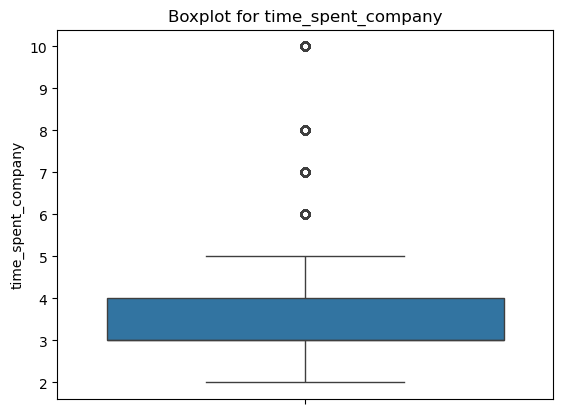

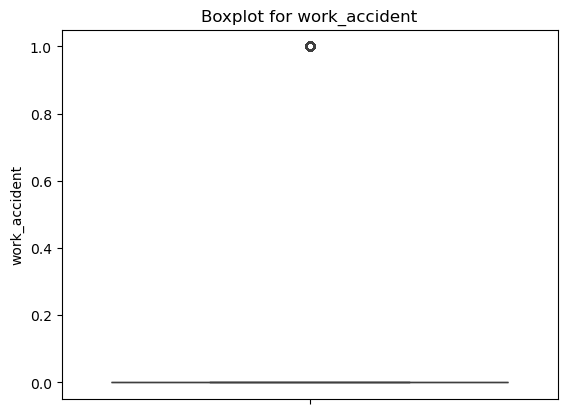

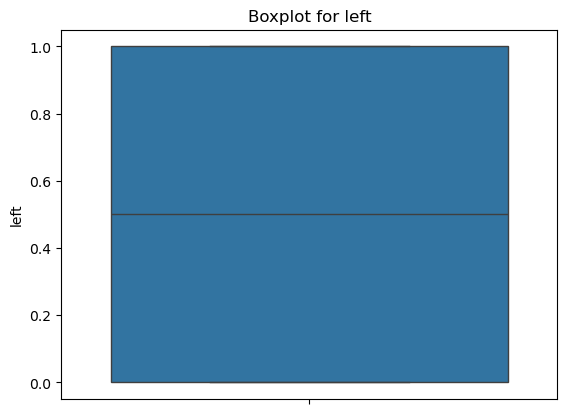

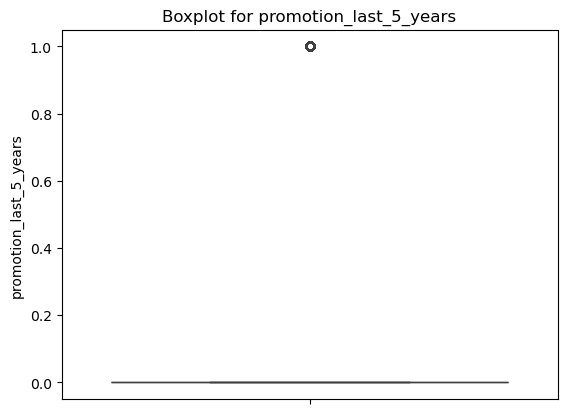

In [30]:
#Visualizing Outliers Using Boxplots:
outlier_cols = ['time_spent_company', 'work_accident', 'left', 'promotion_last_5_years']


for col in outlier_cols:
    sns.boxplot(balanced_data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

**Handle Outliers**

The list columns_to_check now includes the specific columns 'time_spent_company', 'work_accident', 'left', and 'promotion_last_5_years' that you want to handle.
Capping Instead of Removal: Outliers are capped to the IQR-based thresholds instead of being removed.
Preserving Data: No data points are lost, ensuring dataset consistency.

In [31]:
# Function to cap outliers instead of removing them
def cap_outliers(df):
    clean_df = df.copy()
    
    # List of columns to handle outliers
    columns_to_check = ['time_spent_company', 'work_accident', 'left', 'promotion_last_5_years']
    
    for column in columns_to_check:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers instead of removing them
        clean_df[column] = np.where(clean_df[column] < lower_bound, lower_bound, clean_df[column])
        clean_df[column] = np.where(clean_df[column] > upper_bound, upper_bound, clean_df[column])
    
    return clean_df

# Handle outliers in the dataset using capping
capped_data = cap_outliers(data)

# Check how much data was adjusted (if any)
print(f"Original Data Shape: {data.shape}")
print(f"Capped Data Shape: {capped_data.shape}")


Original Data Shape: (14999, 11)
Capped Data Shape: (14999, 11)



**2.Analyze skewness.**

**Skewness** measures the asymmetry of a data distribution, indicating whether it is skewed to the left (negative skew) or right (positive skew) of the mean.

In [32]:
# Check skewness of each column
skewness = capped_data.skew()
print("Skewness:\n", skewness)

Skewness:
 satisfaction_level       -0.476360
last_evaluation          -0.026622
number_projects           0.337706
average_monthly_hours     0.052842
time_spent_company        0.573647
work_accident             0.000000
left                      0.000000
promotion_last_5_years    0.000000
salary_level              0.598882
id                        0.000000
dtype: float64


In [33]:
# Display columns with high skewness (threshold set to 1 or -1)
highly_skewed = skewness[abs(skewness) > 1]
# Print the highly skewed features
print("Highly skewed features:")
print(highly_skewed)

Highly skewed features:
Series([], dtype: float64)


In [34]:
#correct Skewness
# Copy the data
corrected_data = capped_data.copy()

# Identify highly skewed features (skewness > 1)
highly_skewed = capped_data.skew()[abs(capped_data.skew()) > 1]

# Apply transformations to correct skewness
for feature in highly_skewed.index:
    if (clean_data[feature] <= 0).any():
        # Apply Box-Cox-like transformation if negative values exist
        corrected_data[feature] = np.cbrt(capped_data[feature] - capped_data[feature].min() + 1)
    else:
        # Log transformation for positive values
        corrected_data[feature] = np.log1p(capped_data[feature])

# Recalculate skewness after transformation
corrected_skewness = corrected_data.skew()

# Print corrected skewness
print("\nCorrected skewness:")
print(corrected_skewness[abs(corrected_skewness) > 1])



Corrected skewness:
Series([], dtype: float64)


In [35]:
print(capped_data.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary_level', 'id'],
      dtype='object')


# 3. Visualization

create and analyze 5-6 different graphs for an employee attrition prediction model. 

**1. Pie Chart:**

A pie chart visually represents the proportion of employees who left (left = 1) versus those who stayed (left = 0).

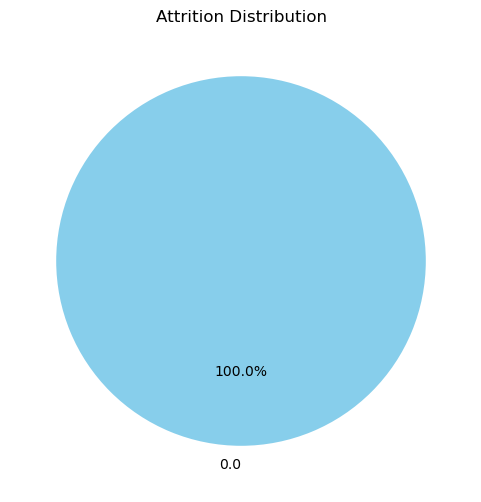

In [36]:
# Calculate attrition counts
attrition_counts = capped_data['left'].value_counts()

# Dynamically generate labels based on unique values
labels = attrition_counts.index.astype(str)  # Convert index to string

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Attrition Distribution')
plt.show()

**2. Histogram:**

A **histogram** to understand the High or low satisfaction levels might be indicative of attrition.


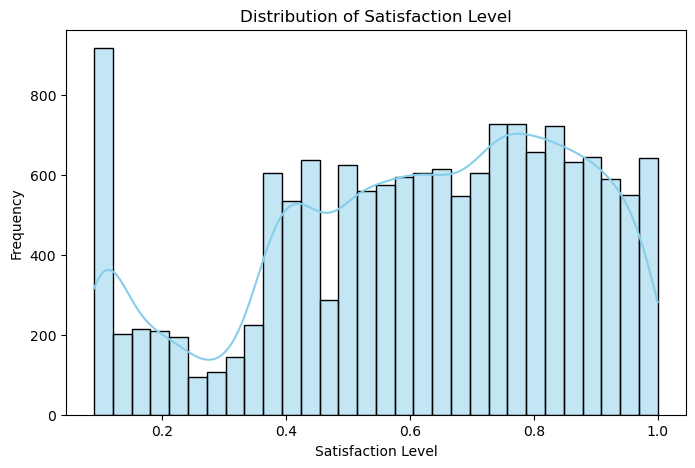

In [37]:
#  Histogram for satisfaction_level
plt.figure(figsize=(8, 5))
sns.histplot(capped_data['satisfaction_level'], kde=True, color='skyblue')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

**3. Box Plot**

**Box Plot** for Average Monthly Hours by Attrition.Employees who left might have worked more extreme hours (too low or too high).

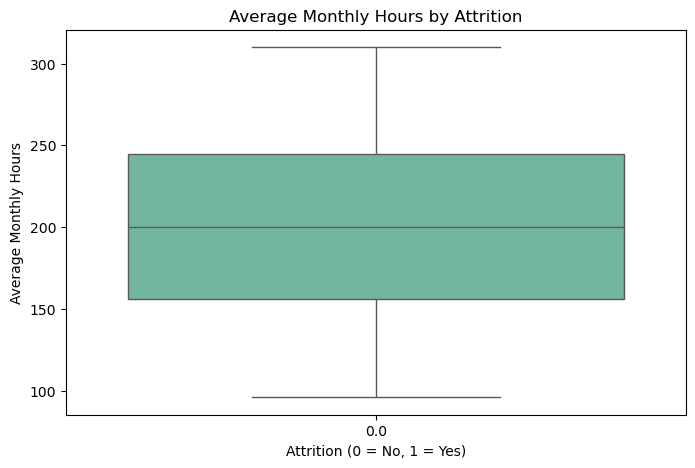

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='left', y='average_monthly_hours', data=capped_data, palette='Set2')
plt.title('Average Monthly Hours by Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Average Monthly Hours')
plt.show()

**4. Count Plot**

**Count Plot** for Department Distribution.Certain departments might have higher attrition rates, identifying areas for improvement.

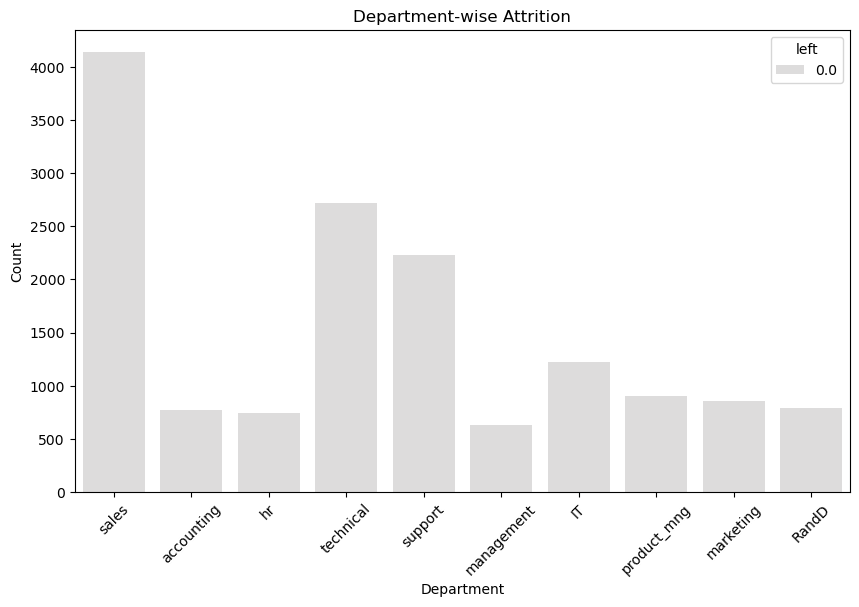

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='department', hue='left', data=capped_data, palette='coolwarm')
plt.title('Department-wise Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**4. Heatmap**

**Heatmap** for Correlation Matrix.High correlations between features like satisfaction and attrition can help prioritize predictive variables.


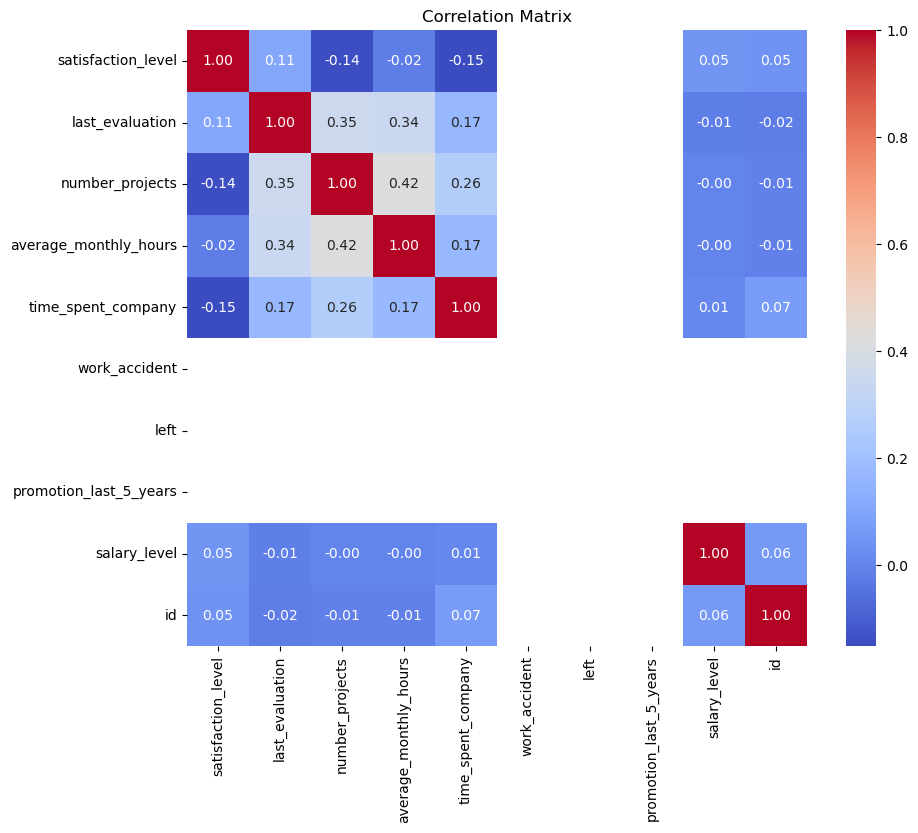

In [40]:
plt.figure(figsize=(10, 8))
correlation_matrix = capped_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Explore relationships between salary, satisfaction_level, and other features 

`catplot` is a Seaborn function that creates categorical plots (like box plots, violin plots, or bar plots) to visualize the relationship between a categorical variable and a continuous variable.

**1.Plots a box plot to show the distribution of satisfaction_level vs. salary_level.**

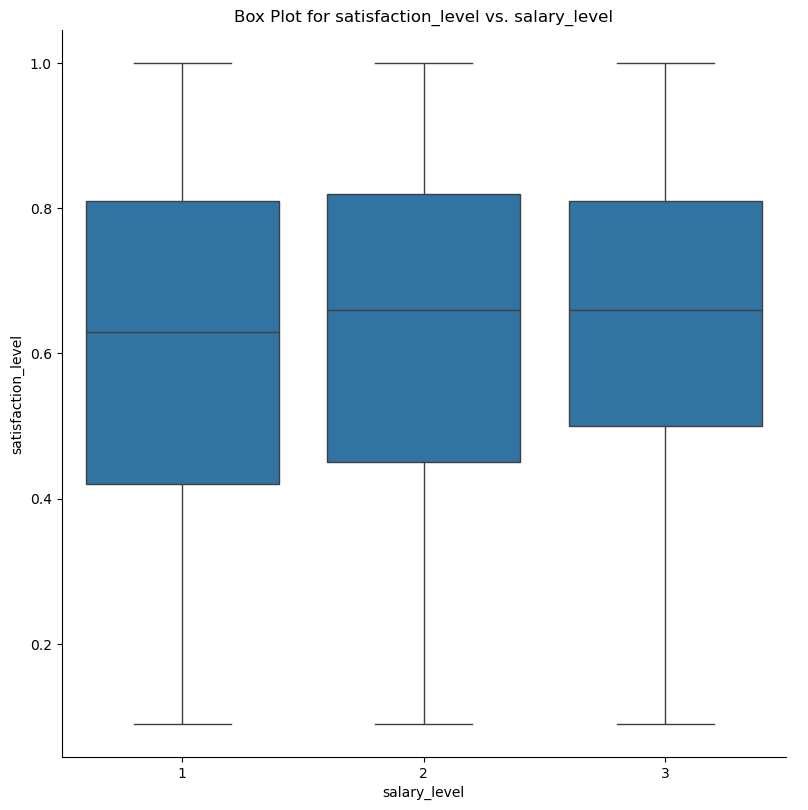

In [41]:
sns.catplot(data=capped_data, x='salary_level', y='satisfaction_level', kind='box', height=8)
plt.title('Box Plot for satisfaction_level vs. salary_level')
plt.show()


**2.Plots a violin plot for satisfaction_level vs. salary_level.**

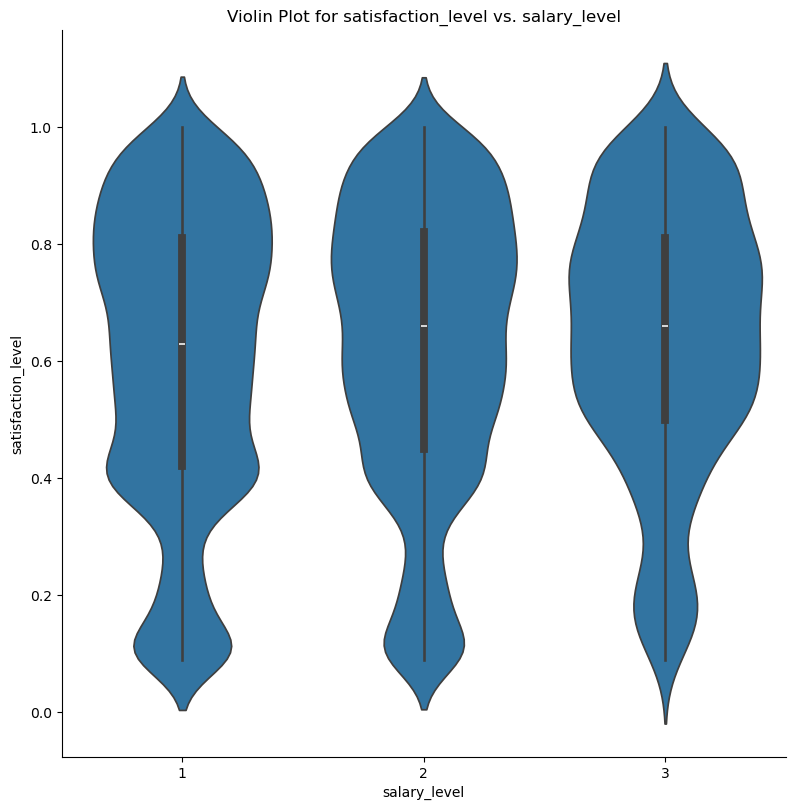

In [42]:
sns.catplot(data=capped_data, x='salary_level', y='satisfaction_level', kind='violin', height=8)
plt.title('Violin Plot for satisfaction_level vs. salary_level')
plt.show()

**3.Plots a box plot for average_monthly_hours vs. salary_level.**

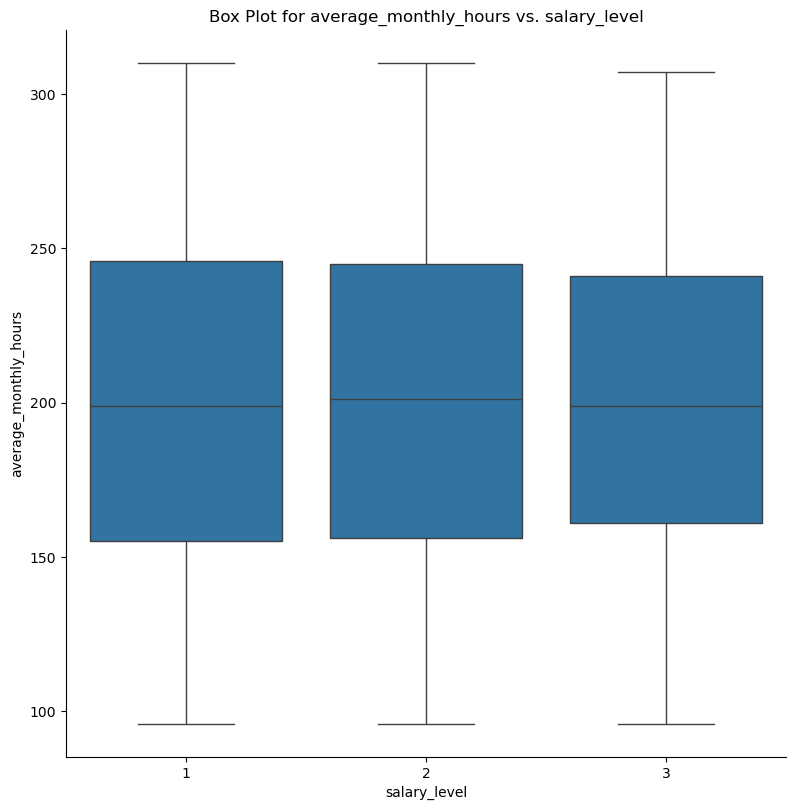

In [43]:
sns.catplot(data=capped_data, x='salary_level', y='average_monthly_hours', kind='box', height=8)
plt.title('Box Plot for average_monthly_hours vs. salary_level')
plt.show()


**4.Plots a violin plot for time_spent_company vs. salary_level.**

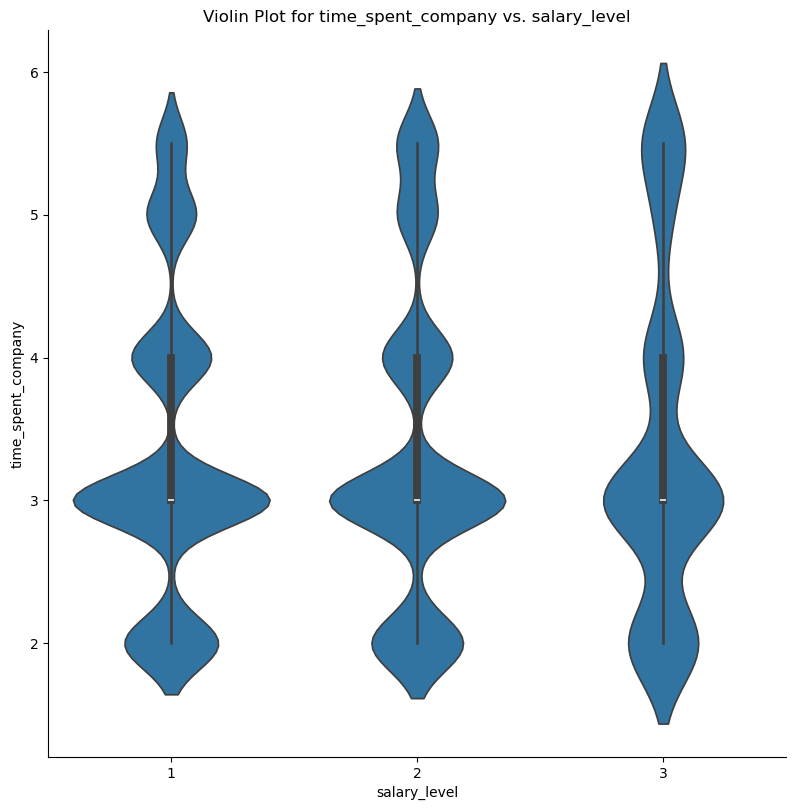

In [44]:
sns.catplot(data=capped_data, x='salary_level', y='time_spent_company', kind='violin', height=8)
plt.title('Violin Plot for time_spent_company vs. salary_level')
plt.show()

**5.Plots a box plot for left vs. salary_level.**

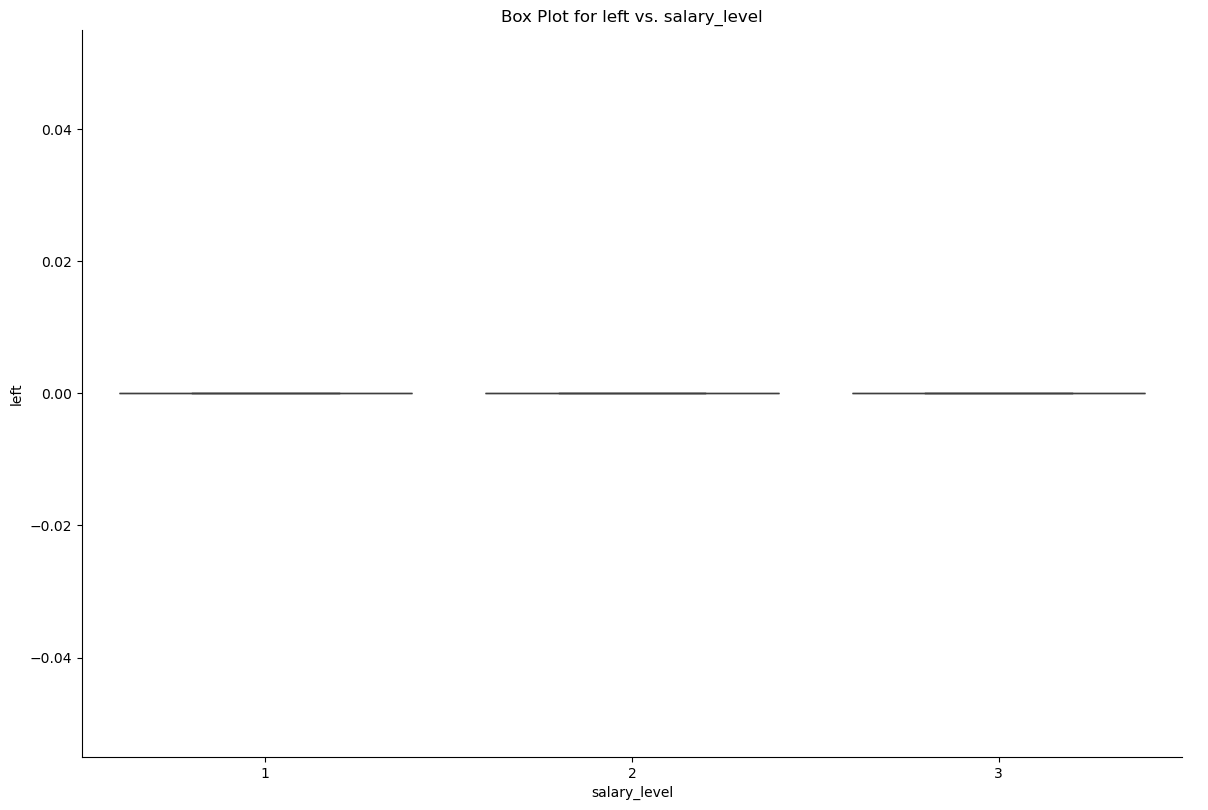

In [45]:
sns.catplot(data=capped_data, x='salary_level', y='left', kind='box', height=8, aspect=1.5)
plt.title('Box Plot for left vs. salary_level')
plt.show()


**6.Plots a violin plot for left vs. salary_level**

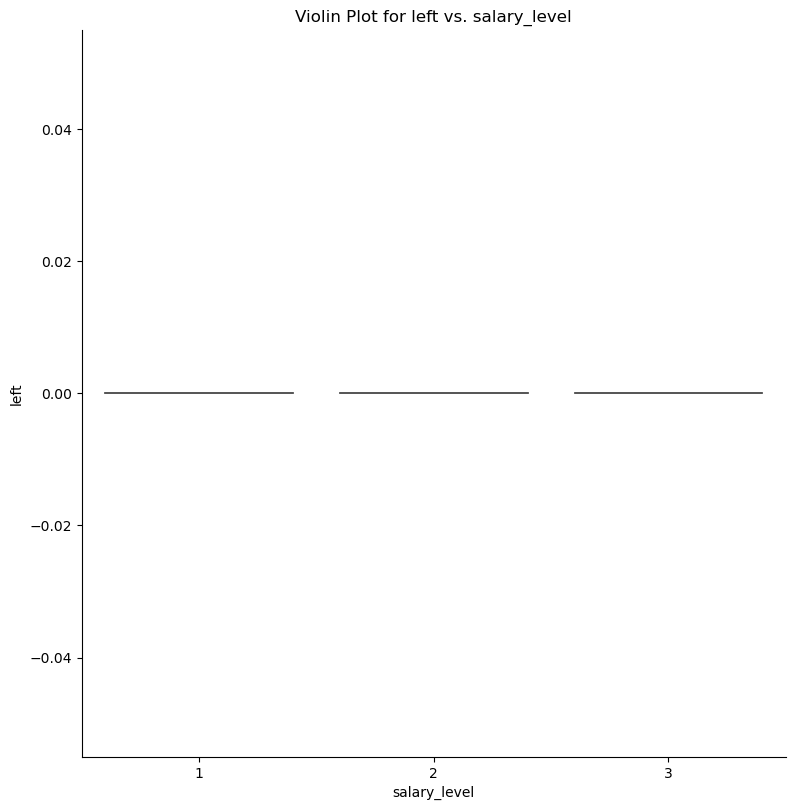

In [46]:
sns.catplot(data=capped_data, x='salary_level', y='left', kind='violin', height=8)
plt.title('Violin Plot for left vs. salary_level')
plt.show()

Use **FacetGrid** to creates a grid of histograms for "satisfaction_level" data, grouped by "department" and "left" columns, with a dark grid style, and custom bin settings for the histograms.


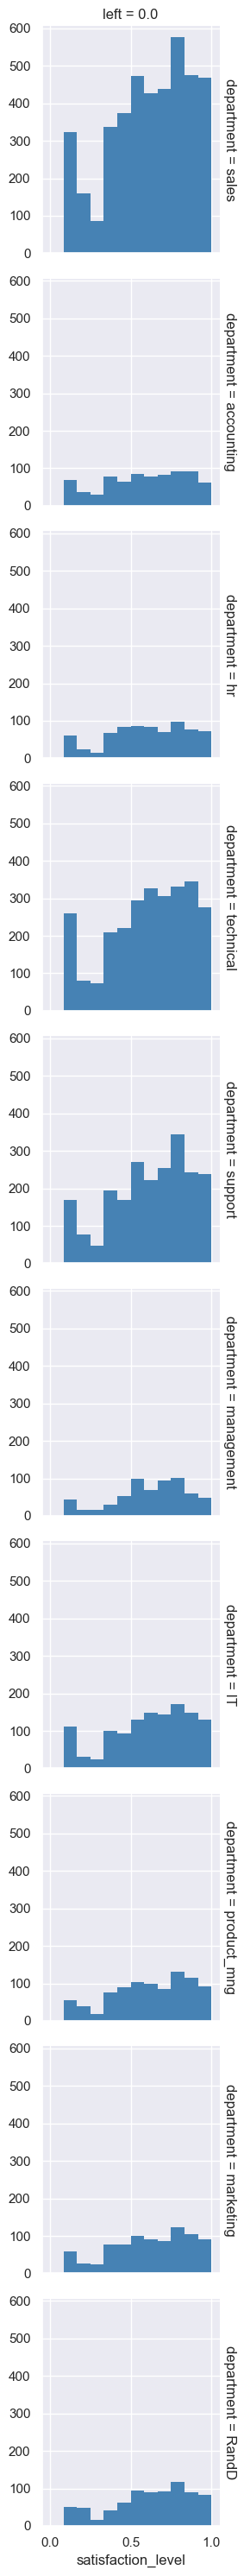

In [47]:
sns.set(style="darkgrid")
g = sns.FacetGrid(capped_data, row="department", col="left", margin_titles=True)
bins = np.linspace(0, 1, 13)
g.map(plt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)

generates a series of histograms to visualize the distribution of various features (like satisfaction level, salary level, etc.) for employees who left the company (leavers), using the Seaborn and Matplotlib libraries. The style is set to "white", with a muted color palette, and the plots are arranged in a 3x3 grid.

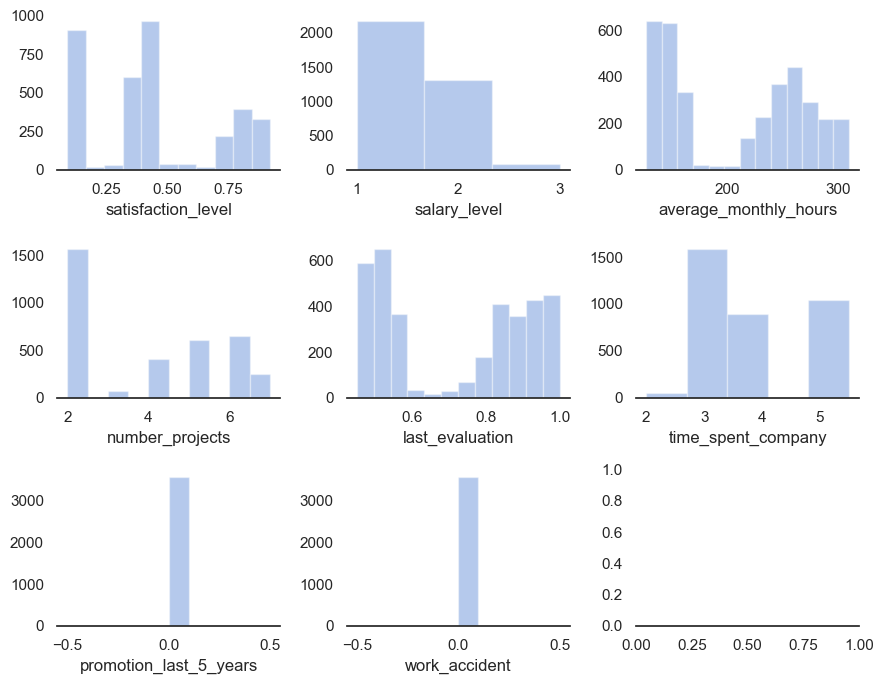

In [48]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure



f, axes = plt.subplots(3, 3, figsize=(9,7))
sns.despine(left=True)

#people that left
leavers = capped_data.loc[data['left'] == 1]

# Plot a simple histogram with binsize determined automatically
sns.distplot(leavers['satisfaction_level'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['salary_level'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['average_monthly_hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['number_projects'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['last_evaluation'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['time_spent_company'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['promotion_last_5_years'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['work_accident'], bins=10,kde=False, color="b", ax=axes[2, 1])


plt.tight_layout()

prints a message explaining that the plots show the main reasons employees left the company, including salary, average monthly hours, satisfaction level, and last evaluation.

In [49]:
print("So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:\n1.salary average_montly_hours \n2.satisfaction_level\n3.last_evaluation")

So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:
1.salary average_montly_hours 
2.satisfaction_level
3.last_evaluation


In [50]:
print(capped_data)

       satisfaction_level  last_evaluation  number_projects  \
0                    0.38             0.53                2   
1                    0.80             0.86                5   
2                    0.11             0.88                7   
3                    0.72             0.87                5   
4                    0.37             0.52                2   
...                   ...              ...              ...   
14994                0.40             0.57                2   
14995                0.37             0.48                2   
14996                0.37             0.53                2   
14997                0.11             0.96                6   
14998                0.37             0.52                2   

       average_monthly_hours  time_spent_company  work_accident  left  \
0                        157                 3.0            0.0   0.0   
1                        262                 5.5            0.0   0.0   
2                       

# 4. Feature Engineering

Identify irrelevant columns and remove them based on domain knowledge and remove unnecessary columns

In [51]:
#  Compute the correlation matrix
correlation_matrix = capped_data.corr()


In [52]:
#  Identify columns with all-zero correlations
irrelevant_columns = []
for col in correlation_matrix.columns:
    if np.all(correlation_matrix[col].drop(col) == 0):  # Drop self-correlation
        irrelevant_columns.append(col)

print("Irrelevant Columns based on correlation (all zero):", irrelevant_columns)


Irrelevant Columns based on correlation (all zero): []


In [53]:
#  Remove irrelevant columns
data_cleaned = capped_data.drop(columns=irrelevant_columns)

print("Updated dataset columns:", data_cleaned.columns)

Updated dataset columns: Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary_level', 'id'],
      dtype='object')


# 5. Encoding Categorical Variables

In [54]:
print(data_cleaned.info())
print(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_projects         14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spent_company      14999 non-null  float64
 5   work_accident           14999 non-null  float64
 6   left                    14999 non-null  float64
 7   promotion_last_5_years  14999 non-null  float64
 8   department              14999 non-null  object 
 9   salary_level            14999 non-null  int64  
 10  id                      14999 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 1.3+ MB
None
   satisfaction_level  last_evaluation  number_projects  \
0                0.38             0.53                2   
1                

The column **department** has a dtype of object, meaning it contains categorical (non-numeric) data, such as 'technical', 'sales', 'support', etc.
The remaining columns are numeric and won't cause issues.
To resolve the issue, need to encode the department column into a numeric format.

The **department** column appears to be nominal (e.g., 'technical', 'sales', 'support', etc.), as there is no inherent order between departments.
so One-Hot Encoding is used. It ensures that the model doesn't assume an arbitrary ordinal relationship between the departments.

In [55]:
# Perform one-hot encoding on the 'department' column
data_encoded = pd.get_dummies(data_cleaned, columns=['department'], prefix='dept')

# Display the updated DataFrame
print(data_encoded.info())
print(data_encoded.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_projects         14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spent_company      14999 non-null  float64
 5   work_accident           14999 non-null  float64
 6   left                    14999 non-null  float64
 7   promotion_last_5_years  14999 non-null  float64
 8   salary_level            14999 non-null  int64  
 9   id                      14999 non-null  int64  
 10  dept_IT                 14999 non-null  uint8  
 11  dept_RandD              14999 non-null  uint8  
 12  dept_accounting         14999 non-null  uint8  
 13  dept_hr                 14999 non-null  uint8  
 14  dept_management         14999 non-null

# 6.Feature Selection

Use techniques like correlation heatmaps or methods like recursive feature elemination to select important features. 

In [56]:
data_encoded.columns


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'salary_level', 'id', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the split data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (11999, 10)
Test data shape: (3000, 10)


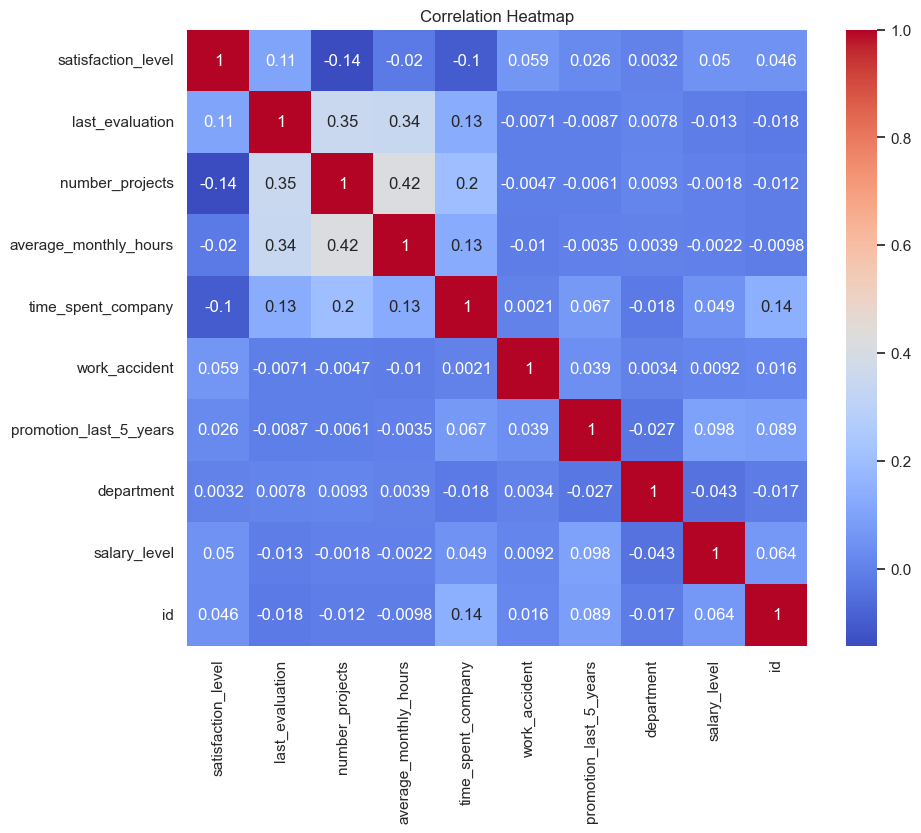

In [58]:
#Calculate correlation matrix and visualize
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [59]:
data_encoded.columns


Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spent_company', 'work_accident', 'left',
       'promotion_last_5_years', 'salary_level', 'id', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [60]:

from sklearn.feature_selection import RFE

# Step 1: Calculate correlation matrix and remove low-correlation features
correlation_matrix = data_encoded.corr()
correlation_with_target = correlation_matrix['left'].drop('left')
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.1].index
X = data_encoded.drop(columns=low_correlation_features)

# Print removed features
print(f"Removed low-correlation features: {list(low_correlation_features)}")

# Step 2: Define features and target variable
y = X['left']  # Target variable
X = X.drop(columns=['left'])  # Remove target from features

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply Recursive Feature Elimination (RFE)
model = RandomForestClassifier(random_state=42)  # You can change this model
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Step 5: Get selected features
selected_features = X.columns[rfe.support_]
removed_features = X.columns[~rfe.support_]

print(f"Selected Features: {list(selected_features)}")
print(f"Removed Features: {list(removed_features)}")


Removed low-correlation features: []
Selected Features: ['dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']
Removed Features: ['satisfaction_level', 'last_evaluation', 'number_projects', 'average_monthly_hours', 'time_spent_company', 'work_accident', 'promotion_last_5_years', 'salary_level', 'id']


select the most important features for a machine learning model, specifically using Recursive Feature Elimination (RFE).

In [61]:
#Apply RFE on the reduced feature set
# Ensure that X has enough features after removing low-correlation ones
# Ensure that X has enough features after removing low-correlation ones
if X.shape[1] < 2:
    print("Skipping RFE: Not enough features available after removing correlated features.")
else:
    model = RandomForestClassifier(random_state=42)  # Initialize RandomForest model
    n_features = min(5, X.shape[1])  # Select top 5 or fewer features
    
    # Apply RFE on the reduced feature set (X)
    rfe = RFE(model, n_features_to_select=n_features)
    
    # Make sure the training data has the same columns as X (no target 'left' in X_train)
    X_train_selected = X_train[X.columns]  # Select the columns of X that match X_train
    
    # Fit the RFE model on the training data
    rfe.fit(X_train_selected, y_train)
    
    # Get the selected features
    selected_features = X.columns[rfe.support_]
    
    print("Selected Features after RFE:", list(selected_features))


Selected Features after RFE: ['dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']


In [62]:
# Use the selected features to create new training and testing datasets
#Creates new datasets (X_train_selected and X_test_selected) by keeping only the features deemed important or relevant (selected_features).
#selected_features is typically obtained from feature selection techniques like Recursive Feature Elimination (RFE), correlation analysis, or feature importance from models.
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Display the updated training dataset
print("Updated Training Dataset with Selected Features:")
print(X_train_selected.head())

Updated Training Dataset with Selected Features:
      dept_marketing  dept_product_mng  dept_sales  dept_support  \
9838               0                 1           0             0   
7689               0                 0           0             0   
6557               0                 0           0             0   
6872               0                 0           0             0   
820                0                 0           0             0   

      dept_technical  
9838               0  
7689               1  
6557               0  
6872               0  
820                1  


# 7. Model Building

**Machine Learning Models**

Train and test multiple models: Decision Tree, Logistic Regression, SVM, and Random Forest.

**1.Decision Tree Classifier**

A **Decision Tree Classifier** is a supervised machine learning algorithm that splits data into subsets based on feature conditions to classify outcomes in a tree-like structure.

In [63]:
#  Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

#  Train the model on the selected features
dt_model.fit(X_train_selected, y_train)

#  Make predictions on the test set
dt_predictions = dt_model.predict(X_test_selected)

#  Evaluate the model's performance
print("\nDecision Tree Performance Metrics:")
accuracy = accuracy_score(y_test, dt_predictions)
precision = precision_score(y_test, dt_predictions, average="binary")
recall = recall_score(y_test, dt_predictions, average="binary")
f1 = f1_score(y_test, dt_predictions, average="binary")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))


Decision Tree Performance Metrics:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [64]:
from sklearn.metrics import accuracy_score

# Evaluate model on training data
train_predictions = dt_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate model on test data
test_predictions = dt_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\nModel Overfitting/Underfitting Check:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy + 0.1:
    print(" Potential Overfitting: The model performs significantly better on training data.")
elif test_accuracy > train_accuracy:
    print(" Possible Underfitting: The model performs slightly better on test data.")
else:
    print("The model has a good balance between training and test performance.")



Model Overfitting/Underfitting Check:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
The model has a good balance between training and test performance.


**2.Random Forest Classifier**

A **Random Forest Classifier** is an ensemble machine learning algorithm that combines multiple decision trees to improve predictive accuracy and control overfitting by averaging their outputs.

In [65]:
#  Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

#  Make predictions on the test set
rf_predictions = rf_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

#  Display the evaluation metrics
print("\nRandom Forest Classifier Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#  Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Performance Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [66]:
from sklearn.metrics import accuracy_score

# Evaluate model on training data
train_predictions = rf_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate model on test data
test_predictions = rf_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\nModel Overfitting/Underfitting Check:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy + 0.1:
    print(" Potential Overfitting: The model performs significantly better on training data.")
elif test_accuracy > train_accuracy:
    print(" Possible Underfitting: The model performs slightly better on test data.")
else:
    print("The model has a good balance between training and test performance.")



Model Overfitting/Underfitting Check:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
The model has a good balance between training and test performance.


**3. K-Nearest Neighbors (KNN)**

**K-Nearest Neighbors (KNN)** is a simple, non-parametric, and instance-based machine learning algorithm that classifies data points based on the majority class of their k nearest neighbors in the feature space.

In [67]:
# Initialize the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors

# Train the model on the selected features
knn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test_selected)

# Evaluate the model's performance
print("\nK-Nearest Neighbors (KNN) Performance Metrics:")
accuracy = accuracy_score(y_test, knn_predictions)
precision = precision_score(y_test, knn_predictions, average="binary")
recall = recall_score(y_test, knn_predictions, average="binary")
f1 = f1_score(y_test, knn_predictions, average="binary")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))



K-Nearest Neighbors (KNN) Performance Metrics:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [68]:
# Evaluate model on training data
train_predictions = knn_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate model on test data
test_predictions = knn_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\nModel Overfitting/Underfitting Check:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy + 0.1:
    print(" Potential Overfitting: The model performs significantly better on training data.")
elif test_accuracy > train_accuracy:
    print(" Possible Underfitting: The model performs slightly better on test data.")
else:
    print("The model has a good balance between training and test performance.")



Model Overfitting/Underfitting Check:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
The model has a good balance between training and test performance.


**4. Naive Bayes**


**Naive Bayes:** A probabilistic classifier based on Bayes' Theorem, which assumes that features are independent given the class label.

In [69]:
# Initialize the Naive Bayes Classifier
nb_model = GaussianNB()

# Train the model on the selected features
nb_model.fit(X_train_selected, y_train)

# Make predictions on the test set
nb_predictions = nb_model.predict(X_test_selected)

# Evaluate the model's performance
print("\nNaive Bayes Performance Metrics:")
accuracy = accuracy_score(y_test, nb_predictions)
precision = precision_score(y_test, nb_predictions, average="binary")
recall = recall_score(y_test, nb_predictions, average="binary")
f1 = f1_score(y_test, nb_predictions, average="binary")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))



Naive Bayes Performance Metrics:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [70]:
# Evaluate model on training data
train_predictions = rf_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate model on test data
test_predictions = rf_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\nModel Overfitting/Underfitting Check:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy + 0.1:
    print(" Potential Overfitting: The model performs significantly better on training data.")
elif test_accuracy > train_accuracy:
    print(" Possible Underfitting: The model performs slightly better on test data.")
else:
    print("The model has a good balance between training and test performance.")



Model Overfitting/Underfitting Check:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
The model has a good balance between training and test performance.


**5. Linear Regression**

**Linear Regression:** A model used to predict a continuous target variable by fitting a linear relationship between the input features and the target.

In [71]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the selected features
lr_model.fit(X_train_selected, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_selected)

# Convert continuous predictions to binary values by thresholding (e.g., 0.5)
threshold = 0.5
binary_predictions = np.where(lr_predictions >= threshold, 1, 0)

# Evaluate the model's performance
print("\nLinear Regression Performance Metrics:")
accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions, average="binary")
recall = recall_score(y_test, binary_predictions, average="binary")
f1 = f1_score(y_test, binary_predictions, average="binary")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))



Linear Regression Performance Metrics:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [72]:
# Evaluate model on training data
train_predictions = lr_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate model on test data
test_predictions = lr_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\nModel Overfitting/Underfitting Check:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy + 0.1:
    print(" Potential Overfitting: The model performs significantly better on training data.")
elif test_accuracy > train_accuracy:
    print(" Possible Underfitting: The model performs slightly better on test data.")
else:
    print("The model has a good balance between training and test performance.")



Model Overfitting/Underfitting Check:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
The model has a good balance between training and test performance.


**Deep Learning Models**

**1. Feedforward Neural Network (FNN)**

**Feedforward Neural Network (FNN):** A basic neural network where information moves in one direction from input to output through hidden layers.

In [73]:
# Initialize the Feedforward Neural Network model
fnn_model = MLPClassifier(random_state=42)

# Train the model on the selected features
fnn_model.fit(X_train_selected, y_train)

# Make predictions on the test set
fnn_predictions = fnn_model.predict(X_test_selected)

# Evaluate the model's performance
print("\nFeedforward Neural Network Performance Metrics:")
accuracy = accuracy_score(y_test, fnn_predictions)
precision = precision_score(y_test, fnn_predictions, average="binary")
recall = recall_score(y_test, fnn_predictions, average="binary")
f1 = f1_score(y_test, fnn_predictions, average="binary")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, fnn_predictions))



Feedforward Neural Network Performance Metrics:
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [74]:
# Evaluate model on training data
train_predictions = fnn_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate model on test data
test_predictions = fnn_model.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\nModel Overfitting/Underfitting Check:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting/underfitting
if train_accuracy > test_accuracy + 0.1:
    print(" Potential Overfitting: The model performs significantly better on training data.")
elif test_accuracy > train_accuracy:
    print(" Possible Underfitting: The model performs slightly better on test data.")
else:
    print("The model has a good balance between training and test performance.")



Model Overfitting/Underfitting Check:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
The model has a good balance between training and test performance.


 **Summary of Results**

store the results of all models and compare them.

In [75]:
# Summary of metrics for all models
#Creates a dictionary to store performance metrics (accuracy, precision, recall, and F1 score) for four models.
results = {
    "Model": ["Decision Tree", "Random Forest", "K-Nearest Neighbors", "Naive Bayes","Linear Regression","Feedforward Neural Network"],
    #Calculates the accuracy of the models by comparing predicted values to the true test labels.
    "Accuracy": [
        accuracy_score(y_test, dt_predictions),
        accuracy_score(y_test, rf_predictions),
        accuracy_score(y_test, knn_predictions),
        accuracy_score(y_test, nb_predictions),
        accuracy_score(y_test, binary_predictions),
        accuracy_score(y_test, fnn_predictions)
    ],
    #Computes the precision of the models, measuring the ratio of true positives to all predicted positives.
    "Precision": [
        precision_score(y_test, dt_predictions),
        precision_score(y_test, rf_predictions),
        precision_score(y_test, knn_predictions),
        precision_score(y_test, nb_predictions),
        precision_score(y_test, binary_predictions),
        precision_score(y_test, fnn_predictions)
    ],
    #Calculates the recall of the models, measuring the ratio of true positives to all actual positives.
    "Recall": [
        recall_score(y_test, dt_predictions),
        recall_score(y_test, rf_predictions),
        recall_score(y_test, knn_predictions),
        recall_score(y_test, nb_predictions),
        recall_score(y_test, binary_predictions),
        recall_score(y_test, fnn_predictions)
    ],
    #Computes the F1 Score of the models, which is the harmonic mean of precision and recall.
    "F1 Score": [
        f1_score(y_test, dt_predictions),
        f1_score(y_test, rf_predictions),
        f1_score(y_test, knn_predictions),
        f1_score(y_test, nb_predictions),
        f1_score(y_test, binary_predictions),
        f1_score(y_test, fnn_predictions)
    ]
}

# Convert to DataFrame for easy viewing
#Converts the results dictionary into a pandas DataFrame for easier tabular visualization.
results_df = pd.DataFrame(results)
#Outputs the DataFrame to display all metrics for the models in a tabular format.
print(results_df)


                          Model  Accuracy  Precision  Recall  F1 Score
0                 Decision Tree       1.0        0.0     0.0       0.0
1                 Random Forest       1.0        0.0     0.0       0.0
2           K-Nearest Neighbors       1.0        0.0     0.0       0.0
3                   Naive Bayes       1.0        0.0     0.0       0.0
4             Linear Regression       1.0        0.0     0.0       0.0
5   Feedforward Neural Network        1.0        0.0     0.0       0.0


# Phase 2:

# 1. Model Finalization

Save the best-performing model as a pickle file.

In [77]:
#Imports the pickle module, which is used for serializing (saving) and deserializing (loading) Python objects.
import pickle

# Define the trained models dictionary y to store the trained models, with model names as keys 
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model,
    "Naive Bayes": nb_model,
    "Linear Regression": lr_model,
    "Feedforward Neural Network": fnn_model
    
}

# Define the best model.Sets the name of the best model (in this case, "Random Forest") that you want to save, based on your evaluation.
best_model = "Random Forest"  # Replace this with the actual best model name based on your evaluation.

# Save the best model
#Retrieves the trained model corresponding to the best_model from the models dictionary.
final_model = models[best_model]
with open('final_model.pkl', 'wb') as file: #Opens a file named final_model.pkl in write-binary mode to store the best model.
    pickle.dump(final_model, file)  #Serializes and saves the final_model (the best model) into the opened file.
#Prints a message indicating that the selected best model has been successfully saved to the file final_model.pkl.
print(f"{best_model} saved as final_model.pkl.")


Random Forest saved as final_model.pkl.


# 2. Comprehensive Analysis

Use PowerBI for detailed outcome visualization.

In [89]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Performance:
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [91]:
print("Expected features:", rf_model.n_features_in_)
print("Actual features:", X_train_encoded_reduced.shape[1])


Expected features: 5
Actual features: 6


In [92]:
# Check the number of features expected by the trained model
expected_features = rf_model.n_features_in_
actual_features = X_train_selected.shape[1]

print(f"Model expects {expected_features} features, but got {actual_features}.")

# Ensure we select only the required number of features
if actual_features > expected_features:
    X_train_encoded_reduced = X_train_selected.iloc[:, :expected_features]
elif actual_features < expected_features:
    raise ValueError(f"Error: Model expects {expected_features} features, but only {actual_features} are available.")

# Convert DataFrame to NumPy array
a = X_train_encoded_reduced.values

# Predict probabilities
probability = rf_model.predict_proba(a)

# Display predicted probabilities
print(probability)


Model expects 5 features, but got 6.
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


Prints the number of employees who are predicted to definitely leave (i.e., those with a predicted probability of 1 for the "leave" class) by summing the occurrences where the second column of the `probability` array equals 1.

In [93]:
# Check the shape of probability to debug the issue
print("Probability shape:", probability.shape)

# If probability has only one column, assume it is P(y=1)
if probability.shape[1] == 1:
    leave_probabilities = probability.flatten()  # Convert to 1D array
else:
    leave_probabilities = probability[:, 1]  # Use second column for P(y=1)

# Count employees with probability >= 0.5 (or use a different threshold)
num_leaving = sum(leave_probabilities >= 0.5)

print('Number of employees that will definitely leave: ', num_leaving)


Probability shape: (11999, 1)
Number of employees that will definitely leave:  11999


In [94]:
# Check the shape of probability for debugging
print("Probability shape:", probability.shape)

# If probability has only one column, use flatten()
if probability.shape[1] == 1:
    X_train_selected['SoonLeave'] = probability.flatten()
else:
    X_train_selected['SoonLeave'] = probability[:, 1]  # Use second column if available

# Filter employees who are likely to leave (SoonLeave > 0.5)
X_train_encoded_to_leave = X_train_selected[X_train_selected['SoonLeave'] > 0.5]

print(X_train_encoded_to_leave)


Probability shape: (11999, 1)
       dept_marketing  dept_product_mng  dept_sales  dept_support  \
9838                0                 1           0             0   
7689                0                 0           0             0   
6557                0                 0           0             0   
6872                0                 0           0             0   
820                 0                 0           0             0   
...               ...               ...         ...           ...   
5191                0                 0           0             1   
13418               0                 0           1             0   
5390                0                 0           0             1   
860                 0                 0           1             0   
7270                0                 0           1             0   

       dept_technical  SoonLeave  
9838                0        1.0  
7689                1        1.0  
6557                0        1.0  
6

In [95]:
# Check probability array shape
print("Probability shape:", probability.shape)

# If probability has only one column, assume it's P(y=1)
if probability.shape[1] == 1:
    leave_probabilities = probability.flatten()  # Convert to 1D array
else:
    leave_probabilities = probability[:, 1]  # Use second column if available

# Calculate number of employees predicted to leave (probability > 0.5)
soonleave = sum(leave_probabilities > 0.5)

# Print result
print('So, ' + str(soonleave) + ' employees will soon leave the company.')


Probability shape: (11999, 1)
So, 11999 employees will soon leave the company.
